In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import pycountry
import ipywidgets as w
from IPython.display import display


---
title : "Chess Ratings in the year 2025"
author: "Skander Sassi and Ewen Pouliquen"
Format:
     html:
        code-fold: True
        theme : cosmo
---


<h1>Abstract</h1>

<p>In this project, we will present the biographies of the top 3 current chess players. In addition to that, multiple graphs depicting the ranking of all current chess players, per age and country. The graphs we will attempt making are an interactive map, and a simple interactive histogram regrouping the data of ranking per age of the player. A possible idea would be to make (if possible) another final fun interaction similar to the akinator game but with only chess players</p>

<h3>Magnus Carlsen</h3>

<p>Magnus Carlsen, born in 1990 in Norway, is a former World Chess Champion and one of the greatest players in history. Known for his universal style, he has been ranked world number one for over a decade and has held the highest peak rating ever recorded. Carlsen has won multiple World Championship titles in classical, rapid, and blitz, and continues to dominate elite tournaments worldwide.</p>

<figure>
  <img src="https://thebrewnews.com/wp-content/uploads/2025/06/Magnus-Carlsen-Wins-Record-7th-Norway-Chess-Title.jpg" alt="Magnus Carlsen wins Norway Chess 7th time">
  <figcaption>This is Magnus Carlsen winning the Norway Chess tournament and claiming the title for a 7th time!</figcaption>
</figure>


<h3>Gukesh D</h3>

<p>Dommaraju Gukesh, commonly known as Gukesh D, is an Indian chess prodigy born in 2006. He became a grandmaster at the age of 12, one of the youngest in history. In 2023, he broke into the world’s top 10, surpassing Viswanathan Anand as India’s number one. Gukesh is admired for his fearless attacking style and is considered one of the brightest stars of the new generation.</p>

<figure>
  <img src="https://images.chesscomfiles.com/uploads/v1/images_users/tiny_mce/AnthonyLevin/php0qqLXE.jpg" alt="Gukesh's recent match against Magnus Carlsen">
  <figcaption>Gukesh's recent match against Magnus Carlsen</figcaption>
</figure>

<h3>Hikaru Nakamura</h3>

<p>Hikaru Nakamura, born in 1987 in Japan and raised in the United States, is a five-time U.S. Chess Champion and one of the most popular figures in modern chess. Known for his sharp tactical play and creativity, Nakamura has been a top-10 player for many years. Beyond classical chess, he is widely recognized as the world’s leading blitz and bullet player, and has a massive online following through streaming and content creation.</p>

<figure>
  <img src="https://app.fide.com/upload/14568/4efdd2f969559e8b1c92e99f32ded48e.jpg" alt="Hikaru Nakamura wins first leg of FIDE Grand Prix 2022">
  <figcaption>Hikaru Nakamura wins first leg of FIDE Grand Prix 2022</figcaption>
</figure>

# simple exploration of data
### here is the data we have on chess players during september

In [3]:
#Chess Player August and September Data Import
fide_ratings_august = pd.read_csv("C:/Users/skand/Desktop/Chess Rating Project/Data/fide_ratings_august.csv")
fide_ratings_september = pd.read_csv("C:/Users/skand/Desktop/Chess Rating Project/Data/fide_ratings_september.csv")

#Deleting N/A Columns 
clean_fide_ratings_august = fide_ratings_august.drop(columns=["wtitle","otitle","foa" ])
clean_fide_ratings_september = fide_ratings_september.drop(columns=["wtitle","otitle","foa" ])

#Displaying the clean September Data
clean_fide_ratings_september


,id,name,fed,sex,title,rating,games,k,bday
0,53707043,A Darshil,IND,M,NaN,1412,0,40,2013
1,53200465,"A F M Ehteshamul, Hoque (tuhin",BAN,M,NaN,1797,0,40,1977
2,5716365,"A Hamid, Harman",MAS,M,NaN,1552,0,20,1970
3,53200553,A I Sabbir,BAN,M,NaN,1607,0,40,1995
4,5045886,"A K, Kalshyan",IND,M,NaN,1747,0,20,1964
...,...,...,...,...,...,...,...,...,...
203186,1141589,"Zysko, Jan",POL,M,NaN,2129,0,20,1990
203187,80411533,"Zyskowski, Jean-Luc",FRA,M,NaN,1517,0,20,1972
203188,21836060,"Zyto, Karol",POL,M,NaN,1748,0,20,2006
203189,55812104,"Zyuryunina, Tatiana",RUS,F,NaN,1416,0,40,2013


## Here is a distribution figure of the ratings in september

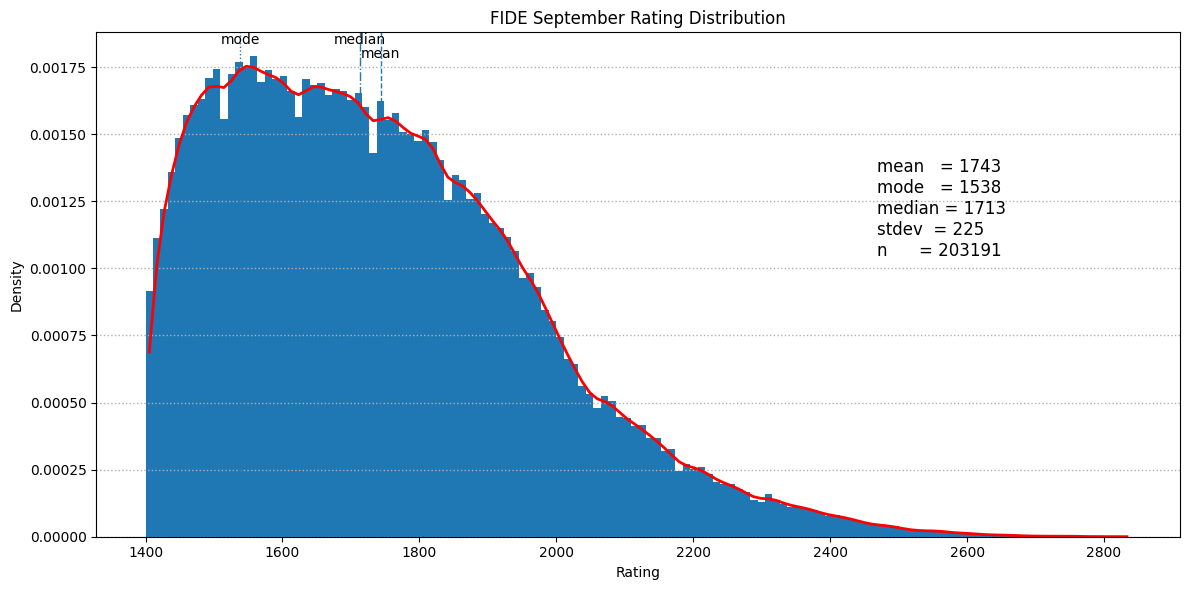

In [12]:
# | label : fig-label-



# Ratings as numeric
ratings = pd.to_numeric(clean_fide_ratings_september.get("rating"), errors="coerce").dropna()
assert len(ratings) > 0, "No numeric 'rating' values found."

n = ratings.size

# — Stats
mean   = float(np.mean(ratings))
median = float(np.median(ratings))
stdev  = float(np.std(ratings, ddof=1))

# mode from a fine histogram (robust when all ratings are unique)
_counts_tmp, _edges_tmp = np.histogram(ratings, bins=120)
_mode_idx = np.argmax(_counts_tmp)
mode = (_edges_tmp[_mode_idx] + _edges_tmp[_mode_idx + 1]) / 2.0

# — Freedman–Diaconis optimal bin count
q25, q75 = np.percentile(ratings, [25, 75])
iqr = q75 - q25
bin_width = 2 * iqr / np.cbrt(ratings.size) if iqr > 0 else 50
bins_fd = max(20, int(np.ceil((ratings.max() - ratings.min()) / bin_width)))

# — Plot
fig, ax = plt.subplots(figsize=(12, 6))

# density=True so the bars share y-scale with the curve
counts, bins, patches = ax.hist(ratings, bins=bins_fd, density=True)

ax.set_title("FIDE September Rating Distribution")
ax.set_xlabel("Rating")
ax.set_ylabel("Density")
ax.grid(True, axis="y", linestyle=":", linewidth=1)

# — Vertical guide lines (mean / median / mode)
ax.axvline(mean,   linestyle="--", linewidth=1)
ax.axvline(median, linestyle="-.", linewidth=1)
ax.axvline(mode,   linestyle=":",  linewidth=1)

ymax = counts.max()
ax.text(mean,   ymax*0.99, "mean",   rotation=0, ha="center", va="bottom")
ax.text(median, ymax*1.02, "median", rotation=0, ha="center", va="bottom")
ax.text(mode,   ymax*1.02, "mode",   rotation=0, ha="center", va="bottom")

# — Gaussian-smoothed density curve (red)
density_counts, density_edges = np.histogram(ratings, bins=bins_fd, density=True)
centers = (density_edges[:-1] + density_edges[1:]) / 2
sigma_bins = 1.2  # tweak: smaller = wavier, larger = smoother
k = np.arange(int(-3*sigma_bins), int(3*sigma_bins) + 1)
gauss = np.exp(-0.5 * (k / sigma_bins) ** 2)
gauss /= gauss.sum()
smooth = np.convolve(density_counts, gauss, mode="same")
ax.plot(centers, smooth, linewidth=2, color="red")

# — Stats box
txt = (
    f"mean   = {int(round(mean))}\n"
    f"mode   = {int(round(mode))}\n"
    f"median = {int(round(median))}\n"
    f"stdev  = {int(round(stdev))}\n"
    f"n      = {ratings.size}"
)
ax.text(0.72, 0.75, txt, transform=ax.transAxes, fontsize=12, va="top")

fig.tight_layout()
plt.show()

# Save for your report
fig.savefig("C:/Users/skand/Desktop/Chess Rating Project/fide_rating_histogram.png", dpi=150)


# Interactive Map
## Here is an Interactive Map presenting the global rankings per country 

In [ ]:
clean_fide_ratings_september["rating_num"] = pd.to_numeric(clean_fide_ratings_september["rating"], errors = "coerce")

<p style="margin-top:2rem;font-size:0.9rem;color:#888;">
  P.S. I’m still learning how to extract data from the CSV files and weave it into the text, and I’m also starting to learn about machine learning.
</p>